In [46]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
%matplotlib inline
from preamble import *
plt.rcParams['image.cmap'] = "gray"
import warnings
warnings.filterwarnings(action = 'ignore')
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname='c:/Windows/Fonts/malgun.ttf').get_name()
rc('font', family = font_name)

iris = load_iris()
scaler = StandardScaler()
scaler.fit(iris.data)
X_scaled = scaler.transform(iris.data)


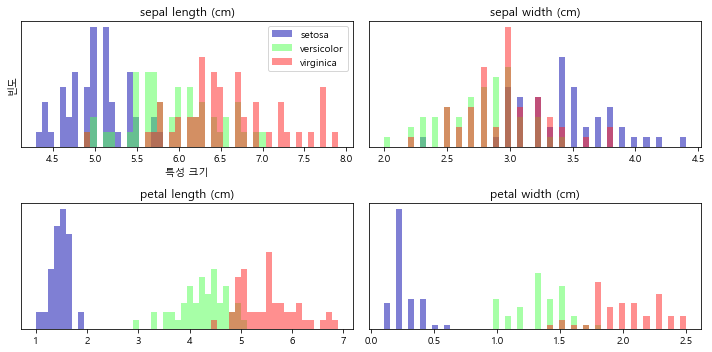

In [47]:
fig, axes = plt.subplots(2,2, figsize = (10,5))
setosa = iris.data[iris.target == 0]
versicolor = iris.data[iris.target == 1]
virginica = iris.data[iris.target == 2]
ax = axes.ravel()

for i in range(4):
    _, bins = np.histogram(iris.data[:,i], bins = 50)
    ax[i].hist(setosa[:,i], bins = bins, color = mglearn.cm3(0), alpha=.5)
    ax[i].hist(versicolor[:,i], bins = bins, color = mglearn.cm3(2), alpha = .5)
    ax[i].hist(virginica[:,i], bins = bins, color = mglearn.cm3(1), alpha = .5)

    ax[i].set_title(iris.feature_names[i])
    ax[i].set_yticks(())
    
ax[0].set_xlabel("특성 크기")
ax[0].set_ylabel("빈도")
ax[0].legend(['setosa', 'versicolor','virginica'], loc = 'best')
fig.tight_layout()

In [48]:
from sklearn.decomposition import PCA
pca =PCA(n_components = 2)
# 데이터의 처음 두개의 주성분만 유지시키겠다.

pca.fit(X_scaled)
#iris 데이터로 pca 모델을 만들겠다.

X_pca = pca.transform(X_scaled)

print('원본 형태 :', str(X_scaled.shape))
print('축소 형태 :', str(X_pca.shape))

원본 형태 : (150, 4)
축소 형태 : (150, 2)


Text(0, 0.5, '두 번째 주성분')

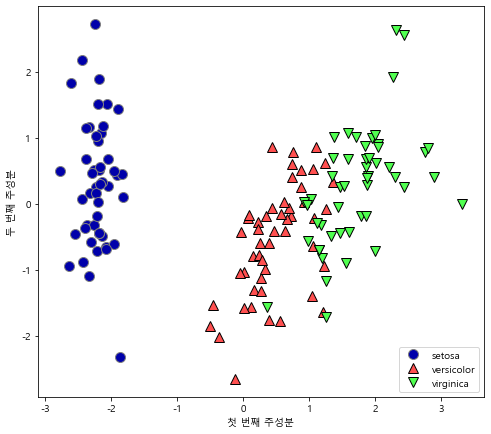

In [50]:
plt.figure(figsize=(8,8))
mglearn.discrete_scatter(X_pca[:,0],X_pca[:,1],  iris.target)
plt.legend(['setosa', 'versicolor','virginica'], loc ='best')
plt.gca().set_aspect('equal')
plt.xlabel('첫 번째 주성분')
plt.ylabel('두 번째 주성분')

In [51]:
print('pca 주성분 shape:{}'.format(pca.components_.shape))
print('pca 주성분 : {}'.format(pca.components_))

pca 주성분 shape:(2, 4)
pca 주성분 : [[ 0.522 -0.263  0.581  0.566]
 [ 0.372  0.926  0.021  0.065]]


Text(0, 0.5, '주성분')

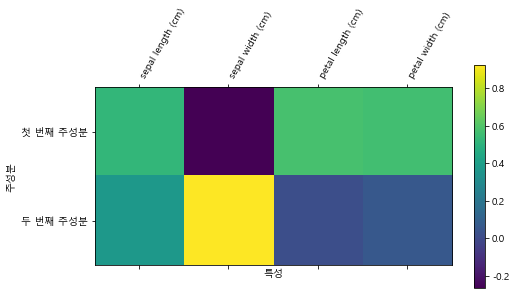

In [52]:
plt.matshow(pca.components_, cmap = 'viridis')
plt.yticks([0,1],["첫 번째 주성분", "두 번째 주성분"])
plt.colorbar()
plt.xticks(range(len(iris.feature_names)),
          iris.feature_names, rotation = 60, ha = 'left')
plt.xlabel('특성')
plt.ylabel('주성분')